<a href="https://colab.research.google.com/github/shinde-chandrakant/Lead-Scoring-Case-Study/blob/master/LeadScoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lead Score - Case Study

<b><font color = maroon>Problem Statement</font></b><br>

<p align="justify">X Education is an education company that offers online courses for industry professionals. The company attracts many visitors to its website through various marketing channels, such as websites, search engines, and referrals. Some of these visitors fill out a form with their contact information and become leads for the company. The sales team then tries to convert these leads into customers by calling them, emailing them, etc. However, the company faces a problem: its lead conversion rate is very low. Out of 100 leads, only 30 become customers on average. This means that the sales team is wasting a lot of time and resources on leads that are not interested or ready to buy.</p>

<p align="justify">To solve this problem, X Education wants to identify the most potential leads, also known as 'Hot Leads'. These are the leads that have a high probability of becoming customers. By focusing on these leads, the company hopes to increase its lead conversion rate and improve its efficiency. The company has hired you to help them with this task. Your job is to build a model that can assign a lead score to each lead based on various factors, such as their demographics, behavior, preferences, etc. The higher the lead score, the more likely the lead is to convert. The lower the lead score, the less likely the lead is to convert. The company's CEO has set a target of achieving an 80% lead conversion rate with this model.</p>

<b><font color = maroon>Goals and Objective</font></b><br>
- <p align="justify">Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.</p>
- <p align="justify">There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.</p>

#### Steps Followed  
- Reading Data
- Cleaning Data
- Data Visualization
- Creating Dummy features
- Splitting Data into Train-Test set
- Builiding Model
- Making Predictions
- Model Evaluations
- ROC Curve
- Prediction on test set
- Precision-Recall

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

## Step 1: Reading and Understanding the Data

In [2]:
lead_df=pd.read_csv('https://raw.githubusercontent.com/shinde-chandrakant/Lead-Scoring-Case-Study/master/Leads.csv') # Reading leads dataframe as lead_df
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
# Inspect the various aspects of the data dataframe
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 2: Data Cleaning

In [6]:
# To check for duplicates
lead_df.loc[lead_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


No duplicates in the data!

In [7]:
# To check for duplicates in columns
print(sum(lead_df.duplicated(subset = 'Lead Number')))
print(sum(lead_df.duplicated(subset = 'Prospect ID')))

0
0


As the values in these columns are different for each entry/row, there are just indicative of the ID and are not important from an analysis point of view. Hence, can be dropped.

In [8]:
lead_df = lead_df.drop(['Lead Number','Prospect ID'],1)

'Select' seems to be the default value stored in the backend for columns that are optional in nature and the prospective lead has chosen not to select any of options available in the dropdown menu.

In [9]:
# To convert 'Select' values to NaN
lead_df = lead_df.replace('Select', np.nan)

In [10]:
# To get percentage of null values in each column
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

We'll drop columns with more than 50% of missing values as it does not make sense to impute these many values. But the variable 'Lead Quality', which has 51.6% missing values seems promising. So we'll keep it for now.

In [13]:
# To drop columns with more than 50% of missing values as it does not make sense to impute these many values
lead_df = lead_df.drop(lead_df.loc[:,list(round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)>52)].columns, 1)

In [14]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad


For other columns, we have to work on column by column basis.  
- For categorical variables, we'll analyse the count/percentage plots.
- For numerical variable, we'll describe the variable and analyse the box plots.

In [17]:
# Function for percentage plots
def percent_plot(var):
    values = (lead_df[var].value_counts(normalize=True)*100)
    plt_p = values.plot.bar(color=sns.color_palette('deep'))
    plt_p.set(xlabel = var, ylabel = '% in dataset')

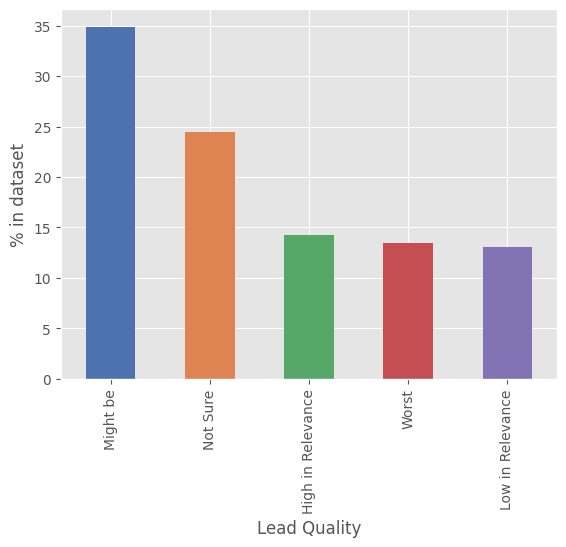

In [18]:
# For Lead Quality
percent_plot('Lead Quality')

Null values in the 'Lead Quality' column can be imputed with the value 'Not Sure' as we can assume that not filling in a column means the employee does not know or is not sure about the option.

In [19]:
lead_df['Lead Quality'] = lead_df['Lead Quality'].replace(np.nan, 'Not Sure')

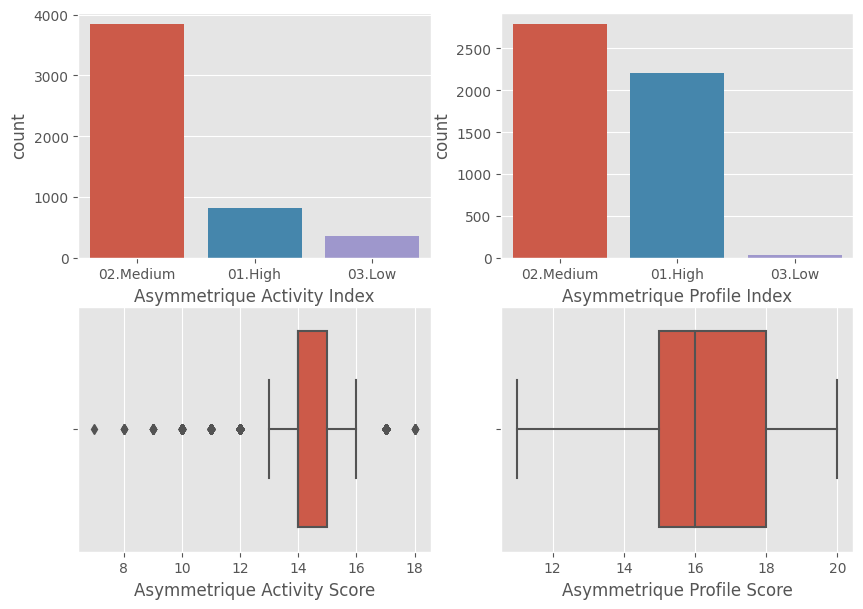

In [32]:
# For 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'
asym_list = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
plt.figure(figsize=(10, 7))
for var in asym_list:
    plt.subplot(2,2,asym_list.index(var)+1)
    if 'Index' in var:
        sns.countplot(data=lead_df, x=var)
    else:
        sns.boxplot(data=lead_df, x=var)
plt.show()

In [33]:
# To describe numerical variables
lead_df[asym_list].describe()

,Asymmetrique Activity Score,Asymmetrique Profile Score
count,5022.000000,5022.000000
mean,14.306252,16.344883
std,1.386694,1.811395
min,7.000000,11.000000
25%,14.000000,15.000000
50%,14.000000,16.000000
75%,15.000000,18.000000
max,18.000000,20.000000


These four variables have more than 45% missing values and it can be seen from the plots that there is a lot of variation in them. So, it's not a good idea to impute 45% of the data. Even if we impute with mean/median for numerical variables, these values will not have any significant importance in the model. We'll have to drop these variables.

In [34]:
lead_df = lead_df.drop(asym_list,1)

In [35]:
# To see percentage of null values in each column
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

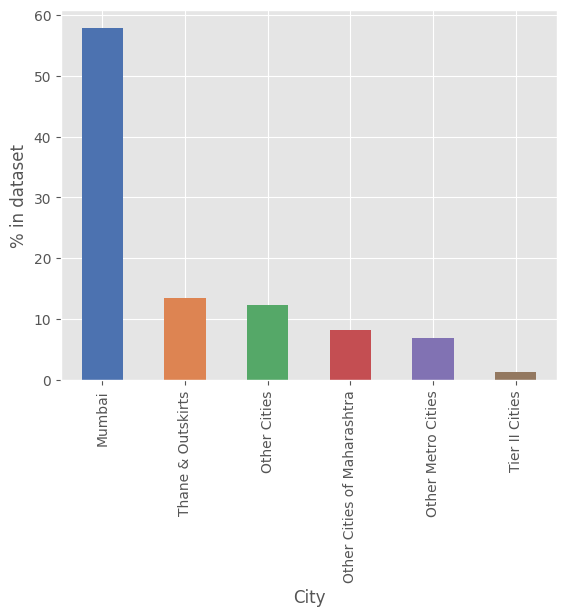

In [36]:
# For 'City'
percent_plot('City')

Around 60% of the City values are Mumbai. We can impute 'Mumbai' in the missing values.

In [37]:
lead_df['City'] = lead_df['City'].replace(np.nan, 'Mumbai')

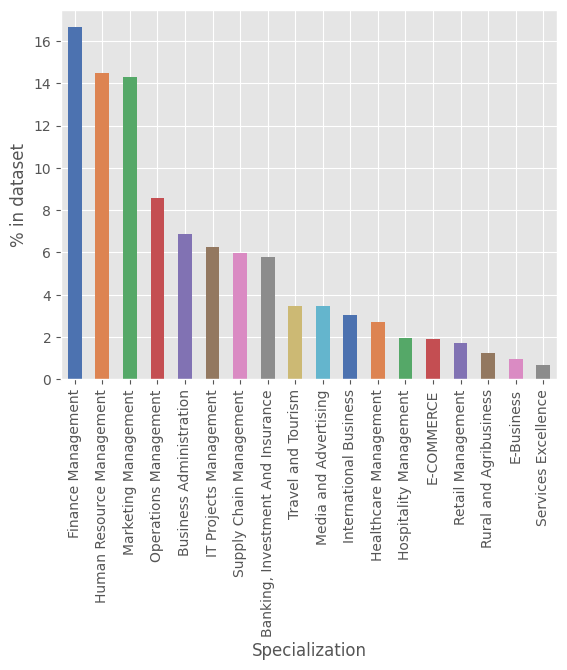

In [38]:
# For 'Specialization'
percent_plot('Specialization')

There are a lot of different specializations and it's not accurate to directly impute with the mean. It is possible that the person does not have a specialization or his/her specialization is not in the options. We can create a new column for that.

In [39]:
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Others')

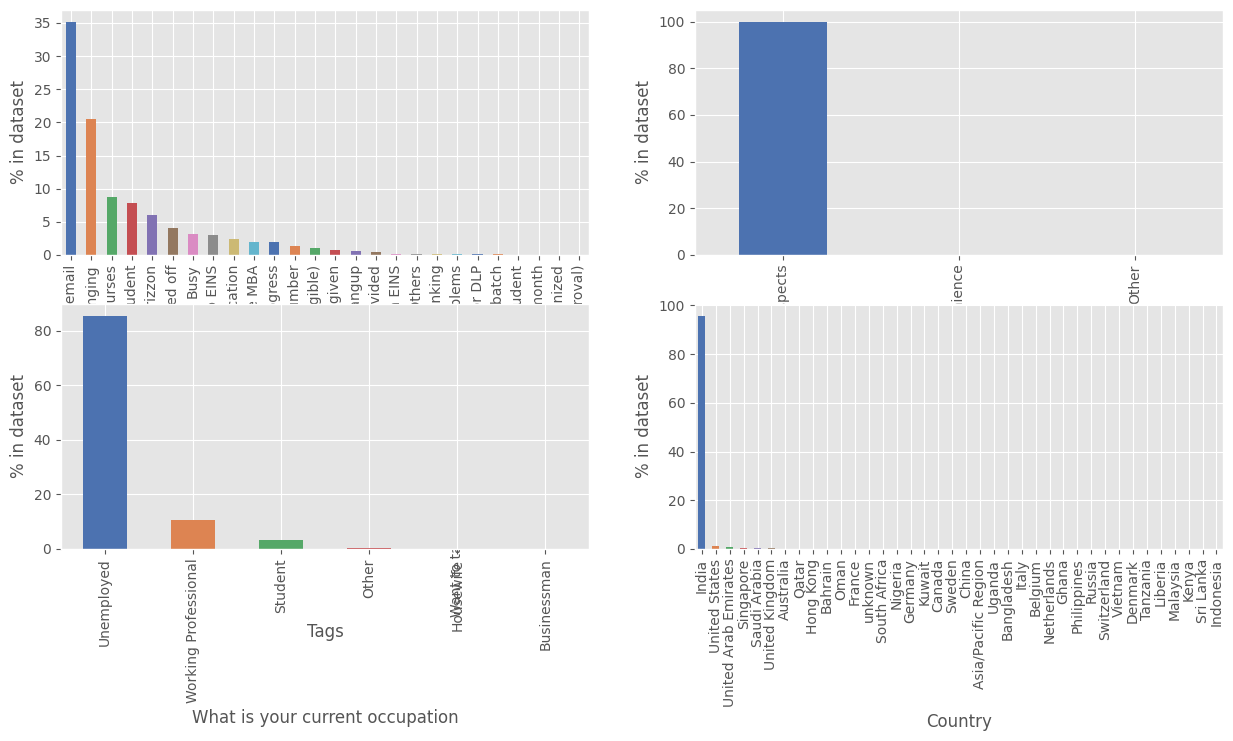

In [44]:
# For 'Tags', 'What matters most to you in choosing a course', 'What is your current occupation' and 'Country'
var_list = ['Tags', 'What matters most to you in choosing a course', 'What is your current occupation', 'Country']
plt.figure(figsize=(15, 7))
for var in var_list:
    plt.subplot(2,2,var_list.index(var)+1)
    percent_plot(var)


In all these categorical variables, one value is clearly more frequent than all others. So it makes sense to impute with the most frequent values.

In [48]:
# To impute with the most frequent value
for var in var_list:
    top_frequent = lead_df[var].describe()['top']
    lead_df[var] = lead_df[var].replace(np.nan, top_frequent)


In [49]:
# Let's see percentage of null values in each column
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

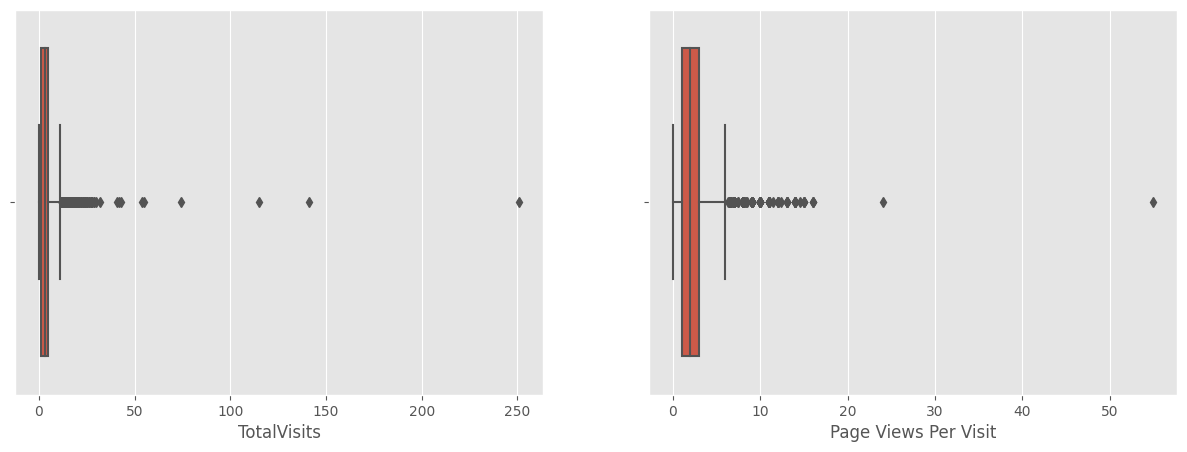

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [51]:
# For 'TotalVisits' and 'Page Views Per Visit'
visit_list = ['TotalVisits', 'Page Views Per Visit']
plt.figure(figsize=(15, 5))
for var in visit_list:
    plt.subplot(1,2,visit_list.index(var)+1)
    sns.boxplot(data=lead_df, x=var)
plt.show()

lead_df[visit_list].describe()

From the above analysis, it can be seen that there is a lot of variation in both of the variables. As the percentage of missing values for both of them are less than 2%, it is better to drop the rows containing missing values.

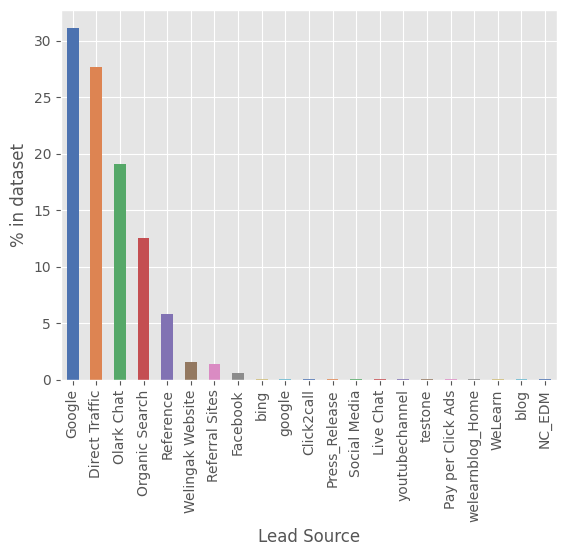

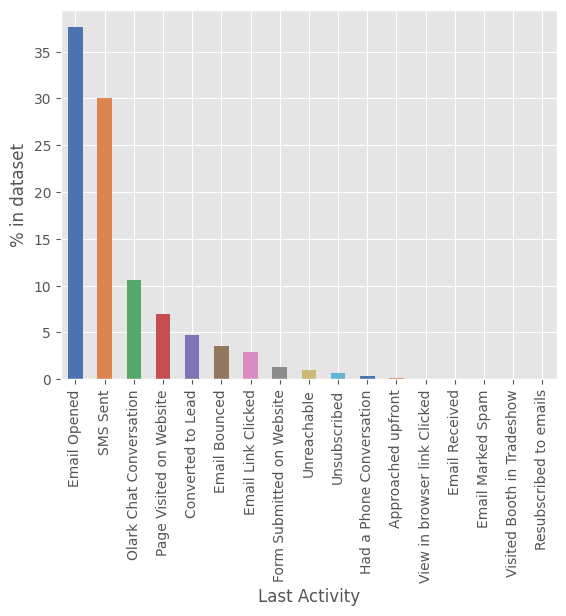

In [52]:
# For 'Lead Source' and 'Last Activity'
var_list = ['Lead Source', 'Last Activity']

for var in var_list:
    percent_plot(var)
    plt.show()

In these categorical variables, imputing with the most frequent value is not accurate as the next most frequent value has similar frequency. Also, as these variables have very little missing values, it is better to drop the rows containing these missing values. Hence, we'll drop the rows containing any missing missing values for above four variables.

In [54]:
# To drop the rows containing missing values
lead_df.dropna(inplace = True)

In [55]:
# Let's see percentage of null values in each column
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

Great! No more missing values.

## Step 3: Data Visualtization